#  Project Speed Dating

Feel free to use the outline of this document (bottom left hand side in VSCode) to quickly navigate around the sections
1. Executive Summary
1. Intoruction
1. Understanding the dataset
1. Transforming the dataset
1. What we learn about participants
1. What we learn about matches


<!-- # <span style="color:red"><b>Idées En Vrac - To be commented</b></span> -->

<!-- * Should we add external ressources ?
* Any risk of confusion factor ?
* revoir si ca vaut le coup de mettre match en boolean. Idem same race. Cross correlation
* tracer match en fonction des autres, voir correlation avec race, religion, ce que les gens pensaient avant de venir...
* pf_o_att : partner_before_event_look_for_attractive          - FLOAT    vérifier que la somme = 100
* afficher df_zip? can we use an API and display points on a map
* Sous chaque graphe mettre un paragraphe interprétation/comment
* Refaire la table du 2.6
* ~~ Créer un environnement specific ? ~~
    * ~~NON~~
* Facteurs de confusion
* Proposer un incentive pour le forms remplis à 100%
    * Attention à la triche cependant
* ... 
* Verifier que yoga, movies... Sont tous bien entre 1 et 10 -->

<!-- 
RELIRE : 

https://medium.com/data-and-beyond/mastering-exploratory-data-analysis-eda-everything-you-need-to-know-7e3b48d63a95
https://medium.com/towardsdev/data-visualization-for-exploratory-data-analysis-eda-in-python-4e1b5b2fe91a


https://github.com/hicham-mrani/Block2_Exploratory-descriptive-and-inferential-data-analysis/blob/master/Speed-Dating-Analysis.ipynb
https://github.com/martin-blais/Speed_Dating-JedhaProject/blob/main/Speed_dating.ipynb
https://github.com/nodelkod/SpeedDatingJedha/blob/master/SpeedDatingPlots.ipynb
https://github.com/LionelSh/Jedha-Speed_Dating/blob/main/Speed_dating.ipynb



-->


# Executive Summary 




* People come mainly for the fun of it and to meet other people.
* Around 10% of the participants come to get a date or to engage in a serious relation
* Matches are triggered when 2 people consider each other fun, attractive and intelligent.  
* Religion and race don't matter. There's no need to organize special or themed evenings.
* People need to have confidence in themselves because those who think they have charm are more likely to get a date.

Regarding data collection :
* Simplification must become the watchword. 
* With 26% of data missing, it seems that filling in the form is too long, too complicated...
* The vast majority of information collected was collected before the event began. 
* There are too many data types, scales and ways of counting. This leads to too many avoidable errors. 
* We have to acept that people don't fill in the forms the day after or 3 weeks after the event, and find other ways (phone calls, incentves...) to get the information. 

Proposals :
* Simplify forms
* Should there be an incentive?
* Think up a phone application
* Gamify form filling (people come for the fun of it)
* To increase the number of matches, should we end the evenings dancing?



# 0. Introduction



## Where are we in the process ?
<p align="center">
<img src="./assets/pipe.png" alt="drawing" width="800"/>
<p>

* This point is important in order to set the expectation level at the right value.
* We are at the very begining of the pipeline
* Everything happens as if we were right after the downlaod phase


## Objectives of this EDA

Here too, the idea is to get in sync about the deliverable one can expect.

1. Read and understand the documentation
    * Keep track of the questions that came up while reading
    * Among others things, understand the process of data collection
    * Identify the target
    * ...
1. Identify the type of the data (quantity, data type...)
1. Identify the quality of the data (null values, duplicate, outliers...)
1. Identify the target
1. Plot the data in order to :
    * Illustrate some of the questions/ideas we may have while reading the documentation 
    * Gain more insights about the dataset
1. During this process, keep track of : 
    * the comments
    * the ideas
    * in order to document actions for further cleaning, analysis, investigations
1. At the end, come with some recommendations regarding what could be done (and why). This may include but this is not limited to :
  * Dropping some rows and columns
  * Rescale/standardize some of the values
  * Rework some of the data visualization
  * Design new features using some of the existing ones
  * ...   

## The objective of this EDA is <span style="color:red"><b>NOT</b></span>
1. To clean the data even if, as we will see, some quick'n easy data cleaning will take place here
1. To determine the weight of the differents features
1. Find or apply a model
1. ...


## Specifications

* The company is experiencing a **decrease** in the number of **matches**
* They are trying to find a way to understand what makes people interested into each other.
* Use the dataset to understand what makes people interested into each other to go on a **second date** together

## Principle of the speed dating as organised

Let's make sure we all share the same understanding


<p align="center">
<img src="./assets/speed_dating.png" alt="drawing" width="600"/>
<p>

## 360° questionnaire
<p align="center">
<img src="./assets/process.png" alt="drawing" width="800"/>
<p>

## Data collection phases
<p align="center">
<img src="./assets/data_collection.png" alt="drawing" width="800"/>
<p>


## Understanding the target

The target is the column `match` (p3 of `02_EDA\Project_Speed_Dating\assets\Speed_Dating_Data_Description.docx`)

<p align="center">
<img src="./assets/match.png" alt="drawing" width="600"/>
<p>

Indeed, as surprisingly explained only in the paragraph dedicated to `match_es` feature, a match happens, if and only if, both participants check the decidion box.

<p align="center">
<img src="./assets/match_explained.png" alt="drawing" width="600"/>
<p>

Finally, the `dec` field keep track of only one side of the equation.

<p align="center">
<img src="./assets/decision.png" alt="drawing" width="600"/>
<p>

The table below explains how it works :
1. Participant 1 met participants 11 ... 20 (line 1)
1. Participants 11 ... 20 all met participant 1 
1. Participant 1 want to meet participant 11 (dec == 1) but match == 0
1. Indeed when participant 11 met participant 1 he set dec to 0 (line 11)
1. Since only one of both participants set dec to 1 then match is set to 0 for both participants


<p align="center">
<img src="./assets/target_explained.png" alt="drawing" width="600"/>
<p> 


# 1. Understanding the dataset

In [383]:
# prelude

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import shutil
import requests
import pgeocode
import plotly.graph_objects as go

from pathlib import Path
k_Current_dir = Path.cwd()

k_CsvUrl      = 'https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv'
k_AssetsDir   = "assets"
k_FileName    = "Speed_Dating_Data.csv"
k_FileCopy    = "Speed_Dating_Data_Copy.csv"

k_Gold        = 1.618     # gold number for ratio
k_Width       = 12
k_Height      = k_Width/k_Gold

k_treshold    = 10/100    # we keep the features with this % of empty cells

pd.set_option('display.max_rows',     500)
pd.set_option('display.max_columns',  500)
pd.set_option('display.width',        1_000)

palette_gender = {
  0 : '#F2A9C7',    # female 
  1 : '#2BADDE'     # male
}


## Download the dataset

* The file is available here : https://full-stack-assets.s3.eu-west-3.amazonaws.com/M03-EDA/Speed+Dating+Data.csv



In [384]:
with requests.Session() as s:
  download = s.get(k_CsvUrl)

filename_out  = k_Current_dir/k_AssetsDir/k_FileName

with open(filename_out, "wb") as f:
  f.write(download.content)


### Make a copy of the dataset

In [385]:
filename_in   = k_Current_dir/k_AssetsDir/k_FileName
filename_out  = k_Current_dir/k_AssetsDir/k_FileCopy
shutil.copyfile(filename_in, filename_out);

The EDA is done with the copy of the dataset.

## First glimpse of the dataset

In [386]:
dataset = pd.read_csv(filename_out, encoding='unicode_escape')
dataset.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

### What is the target ?

1. According the documentation (p10 of ``./assets/Speed_Dating_Data_Description.docx``)
1. The target is the column `match` 
1. It does not have any missing value

In [387]:
tmp = dataset["match"].isnull().sum()
print(f"The target 'match' has {tmp} missing values.")

The target 'match' has 0 missing values.


### How many observations and features are in the dataset ?

In [388]:
print(f"The dataset consists of :")
print(f"\t{len(dataset.shape):>6_} dimensions")
print(f"\t{dataset.shape[0]:>6_} observations (lines)")
print(f"\t{dataset.shape[1]:>6_} features     (columns)")

The dataset consists of :
	     2 dimensions
	 8_378 observations (lines)
	   195 features     (columns)


### What are the data types of the features ? 

In [389]:
df_types = pd.DataFrame ({
  "types" : dataset.dtypes.value_counts()
})
df_types["as_%"] = (100 * df_types["types"]/df_types["types"].sum()).round(2)

display(df_types)

,types,as_%
float64,174,89.23
int64,13,6.67
object,8,4.10


### What about the features of type ``object`` ?

In [390]:
obj_list = dataset.select_dtypes(include="object").columns
obj_features = dataset.loc[:, obj_list ]
obj_features.describe(include="all").T.head(10)

,count,unique,top,freq
field,8315,259,Business,521
undergra,4914,241,UC Berkeley,107
mn_sat,3133,68,"1,400.00",403
tuition,3583,115,"26,908.00",241
from,8299,269,New York,522
zipcode,7314,409,0,355
income,4279,261,"55,080.00",124
career,8289,367,Finance,202


**Comments :** 
* All the features of type `object`have missing values
* ``mn_sat``, ``tuition`` and ``income`` should be float64 
* ``zipcode`` should be transformed.  When available, the 2 numbers around the comma should be joined to form one integer. https://www.zipdatamaps.com/33496. For example, here is a sample of 20 zipcode :

In [391]:
dataset["zipcode"].sample(20)

954     53,705
1966    19,087
8177    95,831
3303       NaN
544     94,133
5499     3,186
401     48,124
2620    11,803
1797     1,720
6871    10,027
5914     7,069
5291     8,225
7373     2,138
6001    10,128
6707    10,016
4875       NaN
939          0
2718    10,012
3463    10,598
7754    48,306
Name: zipcode, dtype: object

For example here is how the zip codes are dispatched in US (US only)

In [392]:
# let's make a copy
# can we use an API and display points on a map
df_zip = pd.DataFrame(dataset["zipcode"])

df_zip["zipcode"] = df_zip["zipcode"].str.replace(",", "")

nomi = pgeocode.Nominatim('us')
df_zip['Latitude']  = (nomi.query_postal_code(df_zip['zipcode'].tolist()).latitude)
df_zip['Longitude'] = (nomi.query_postal_code(df_zip['zipcode'].tolist()).longitude)

fig = go.Figure(
  data=go.Scattergeo(
    lon = df_zip['Longitude'],
    lat = df_zip['Latitude'],
    mode = 'markers',
  )
)

fig.update_layout(
  title = 'Zip code in US',
  geo_scope='usa',
)

fig.show()

### What about features of type ``int`` ?

In [393]:
int64_list = dataset.select_dtypes(include="int").columns
int64_features = dataset.loc[:, int64_list ]
int64_features.describe(include="all").T.head(20)

,count,mean,std,min,25%,50%,75%,max
iid,8378.0,283.675937,158.583367,1.0,154.0,281.0,407.0,552.0
gender,8378.0,0.500597,0.500029,0.0,0.0,1.0,1.0,1.0
idg,8378.0,17.327166,10.940735,1.0,8.0,16.0,26.0,44.0
condtn,8378.0,1.828837,0.376673,1.0,2.0,2.0,2.0,2.0
wave,8378.0,11.350919,5.995903,1.0,7.0,11.0,15.0,21.0
round,8378.0,16.872046,4.358458,5.0,14.0,18.0,20.0,22.0
position,8378.0,9.042731,5.514939,1.0,4.0,8.0,13.0,22.0
order,8378.0,8.927668,5.477009,1.0,4.0,8.0,13.0,22.0
partner,8378.0,8.963595,5.491068,1.0,4.0,8.0,13.0,22.0
match,8378.0,0.164717,0.370947,0.0,0.0,0.0,0.0,1.0


**Comments :** 
* None of these features have missing values
* There is no missing values for the target (`match`)
* Names are not easy to grasp. They should be modified to make them more readable
* At this point tha values and the ranges of values seems to be OK 

### What about features of type ``float`` ?

In [394]:
float64_list = dataset.select_dtypes(include="float").columns
float64_features = dataset.loc[:,float64_list ]

print("Below, only THE FIRST 20 features of type `float` are listed : \n")
float64_features.describe().T.head(10)
# float64_features.describe().T             # uncomment this line to get access to all features of type float

Below, only THE FIRST 20 features of type `float` are listed : 



,count,mean,std,min,25%,50%,75%,max
id,8377.0,8.960248,5.491329,1.00,4.00,8.00,13.00,22.00
positin1,6532.0,9.295775,5.650199,1.00,4.00,9.00,14.00,22.00
pid,8368.0,283.863767,158.584899,1.00,154.00,281.00,408.00,552.00
int_corr,8220.0,0.196010,0.303539,-0.83,-0.02,0.21,0.43,0.91
age_o,8274.0,26.364999,3.563648,18.00,24.00,26.00,28.00,55.00
race_o,8305.0,2.756653,1.230689,1.00,2.00,2.00,4.00,6.00
pf_o_att,8289.0,22.495347,12.569802,0.00,15.00,20.00,25.00,100.00
pf_o_sin,8289.0,17.396867,7.044003,0.00,15.00,18.37,20.00,60.00
pf_o_int,8289.0,20.270759,6.782895,0.00,17.39,20.00,23.81,50.00
pf_o_fun,8280.0,17.459714,6.085526,0.00,15.00,18.00,20.00,50.00


**Comments :** 
* 90% ($\frac{174}{195}$) of the features are of type float
* One ``id`` (subject number within wave) is missing
* Looking at the count, we realize that many values are missing
* Again, names of the features are not easy to understand. They should be updated to make them more readable
* The features below should be converted to int :
    * `id`
    * `positin1` 
    * `age_o` 
    * `race_o` 


### Is there any duplicated observations ?

In [395]:
print(f"The dataset contains {dataset.duplicated().sum()} duplicated observations that need to be deduplicated.")


The dataset contains 0 duplicated observations that need to be deduplicated.


### One view of the dataset, underlying the issue with the missing values.

In [396]:
def quick_view(df):
  summary_lst = []
  
  for col_name in df.columns:
    col_dtype               = df[col_name].dtype
    num_of_null             = df[col_name].isnull().sum()
    percent_of_null         = num_of_null/len(df)
    num_of_non_null         = df[col_name].notnull().sum()
    num_of_distinct_values  = df[col_name].nunique()
    
    if num_of_distinct_values <= 10:
        distinct_values_counts = df[col_name].value_counts().to_dict()
    else:
        top_10_values_counts    = df[col_name].value_counts().head(10).to_dict()
        distinct_values_counts  = {k: v for k, v in sorted(top_10_values_counts.items(), key=lambda item: item[1], reverse=True)}

    if col_dtype != "object":
       max_of_col = df[col_name].max()
       min_of_col = df[col_name].min()
    else:
       max_of_col = -1
       min_of_col = 1
    
    summary_lst.append({
      'col_name'                : col_name,
      'col_dtype'               : col_dtype,
      'num_of_null'             : num_of_null,
      'percent_of_null'         : (100*percent_of_null).round(2),
      'num_of_non_null'         : num_of_non_null,
      'num_of_distinct_values'  : num_of_distinct_values,
      'max_value'               : max_of_col,
      'min_value'               : min_of_col,
      'distinct_values_counts'  : distinct_values_counts
    })
  
  tmp_df = pd.DataFrame(summary_lst)
  return tmp_df



In [397]:
tmp_df = quick_view(dataset)

print("Below, only THE FIRST 20 features are listed : \n")
display(tmp_df.sort_values(by="num_of_null", ascending=False).head(20))
#display(summary_df.sort_values(by="num_of_null", ascending=False))                 # to get access to all features at once

Below, only THE FIRST 20 features are listed : 



,col_name,col_dtype,num_of_null,percent_of_null,num_of_non_null,num_of_distinct_values,max_value,min_value,distinct_values_counts
160,num_in_3,float64,7710,92.03,668,4,4.0,0.0,"{1.0: 430, 0.0: 159, 2.0: 61, 4.0: 18}"
159,numdat_3,float64,6882,82.14,1496,6,9.0,0.0,"{1.0: 888, 0.0: 293, 2.0: 181, 4.0: 63, 3.0: 5..."
68,expnum,float64,6578,78.52,1800,18,20.0,0.0,"{3.0: 270, 2.0: 260, 5.0: 230, 4.0: 205, 10.0:..."
123,sinc7_2,float64,6423,76.67,1955,16,40.0,0.0,"{10.0: 610, 20.0: 443, 5.0: 203, 15.0: 196, 0...."
126,amb7_2,float64,6423,76.67,1955,10,20.0,0.0,"{0.0: 536, 5.0: 527, 10.0: 442, 15.0: 169, 20...."
127,shar7_2,float64,6404,76.44,1974,14,40.0,0.0,"{10.0: 437, 5.0: 430, 20.0: 314, 15.0: 280, 0...."
122,attr7_2,float64,6394,76.32,1984,16,80.0,10.0,"{30.0: 376, 20.0: 330, 50.0: 239, 40.0: 212, 1..."
124,intel7_2,float64,6394,76.32,1984,16,50.0,0.0,"{10.0: 646, 20.0: 576, 15.0: 282, 30.0: 108, 0..."
125,fun7_2,float64,6394,76.32,1984,16,50.0,0.0,"{20.0: 549, 10.0: 470, 15.0: 318, 30.0: 214, 2..."
194,amb5_3,float64,6362,75.94,2016,9,10.0,1.0,"{7.0: 610, 8.0: 384, 6.0: 328, 9.0: 259, 5.0: ..."


**Comments :** 
* Overall, we have a serious problem with the missing values
* Looking at the 4th row ``percent_of_null``. What can we expect from feature when 92% of the data are missing ?


### Can we get more insights about empty cells ?

In [398]:
print(f"Total # of cells = {dataset.shape[0]*dataset.shape[1]:>12_.2f}")

empty_cells = dataset.isna().sum().sum()
print(f"# of empty cells = {empty_cells:>12_.2f}")

percent_empty_cells = (100*dataset.isna().sum().sum()/(dataset.shape[0]*dataset.shape[1])).round(2)
print()
print(f"{percent_empty_cells:>.2f} % of the cells are empty")

df_tmp = pd.DataFrame(dataset.isna().sum().sort_values(ascending=False))
df_tmp = df_tmp.cumsum()

percent_80 = empty_cells*80/100
bob = df_tmp.loc[df_tmp[0]<=percent_80]
print()
print(f"80% of the empty cells come from {100*len(bob)/dataset.shape[1]:.2f}% of the features ({len(bob)} features over {dataset.shape[1]})")

Total # of cells = 1_633_710.00
# of empty cells =   432_016.00

26.44 % of the cells are empty

80% of the empty cells come from 33.85% of the features (66 features over 195)


### Can we visualize the impact of the empty cells ?

#### Features with more than 50% of null values

C:\Users\phili\AppData\Local\Temp\ipykernel_5944\3146464991.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



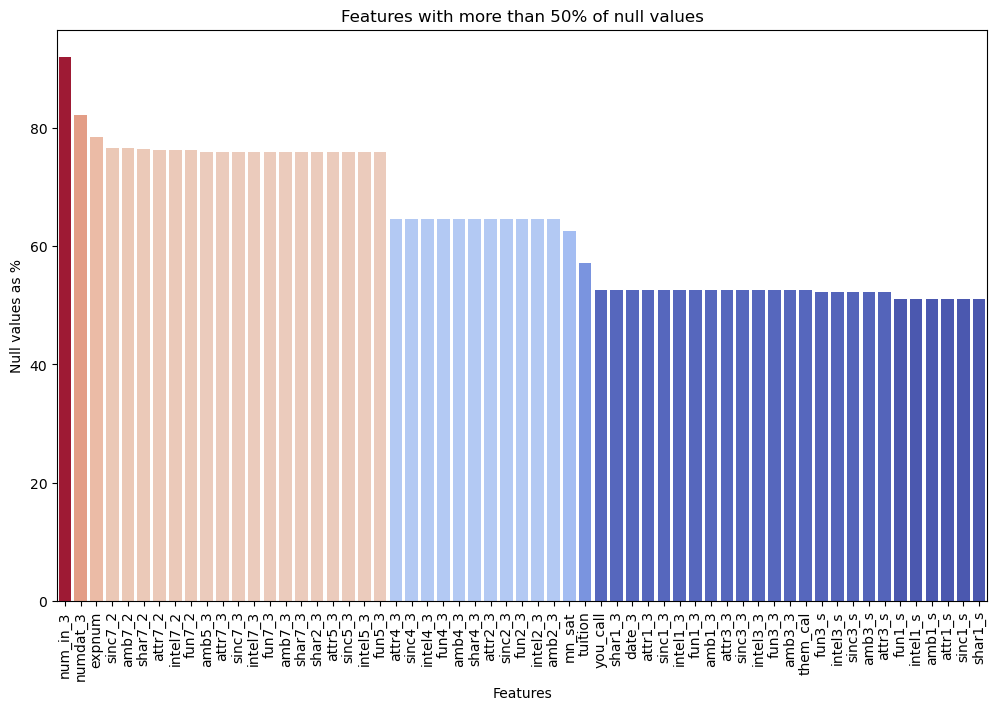

In [399]:
df_empty = pd.DataFrame((dataset.isna().sum() / len(dataset) * 100).sort_values(ascending=False).round(2))
df_most_empty = df_empty[df_empty[0]>50]

fig, ax = plt.subplots(figsize=(k_Width,k_Height))
sns.barplot (df_most_empty,  x=df_most_empty.index, y=0, palette="coolwarm", hue=0, legend=False);               
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Features with more than 50% of null values")
ax.set_xlabel("Features")
ax.set_ylabel("Null values as %")
plt.show();


**Comments :** 
* In first approximation and reading the end of the x labels, it seems that the features ending with _3, _2 and _s are mostly concerned
* According to the documentation of the dataset, this means that after the begining of the event, few data were added to the forms


#### Features with between 10 and 50% of null values

C:\Users\phili\AppData\Local\Temp\ipykernel_5944\2301508490.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



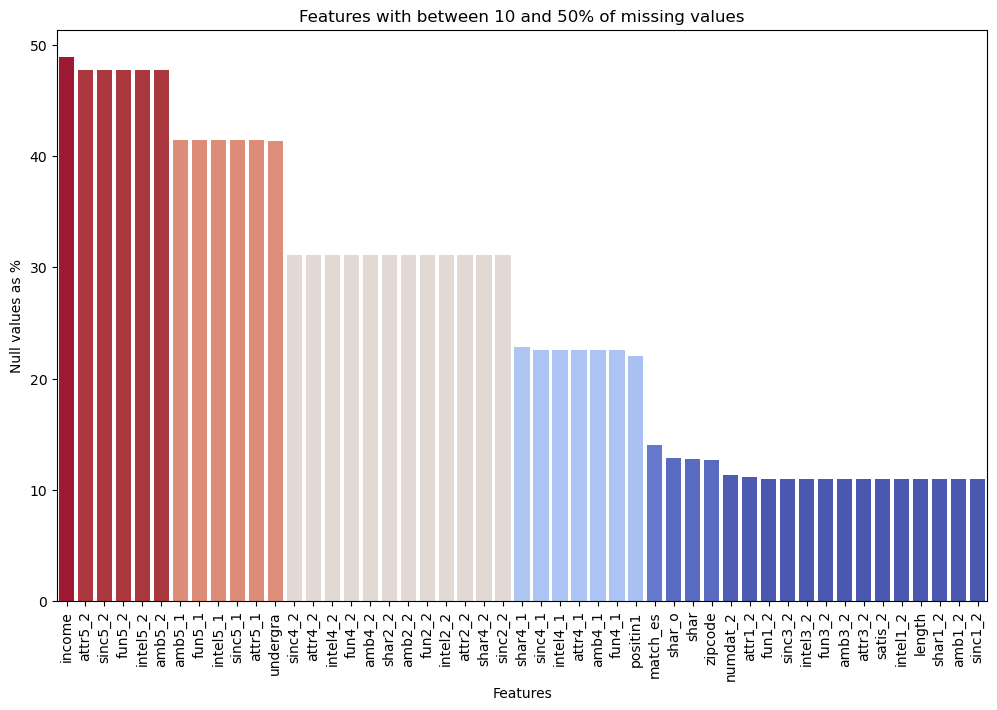

In [400]:
df_most_empty = df_empty[(df_empty[0]>10) & (df_empty[0]<=50)]

fig, ax = plt.subplots(figsize=(k_Width, k_Height))
sns.barplot (df_most_empty,  x=df_most_empty.index, y=0, palette="coolwarm", hue=0, legend=False);               
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Features with between 10 and 50% of missing values")
ax.set_xlabel("Features")
ax.set_ylabel("Null values as %")
plt.show();


**Comments :** 
* Reading the end of the x labels it seems that the features ending with _2 and _1 are mostly concerned
* Surprisingly, it seems that there are levels and that the number of empty cells varies discontinuously.
* For example, a set a features has 30% of empty cells while another group has 40+%
* We might have expected more randomness in the levels
* Did the features have been filled/unfilled automatically ?


#### Features with less than 10% of null values

C:\Users\phili\AppData\Local\Temp\ipykernel_5944\3593663884.py:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



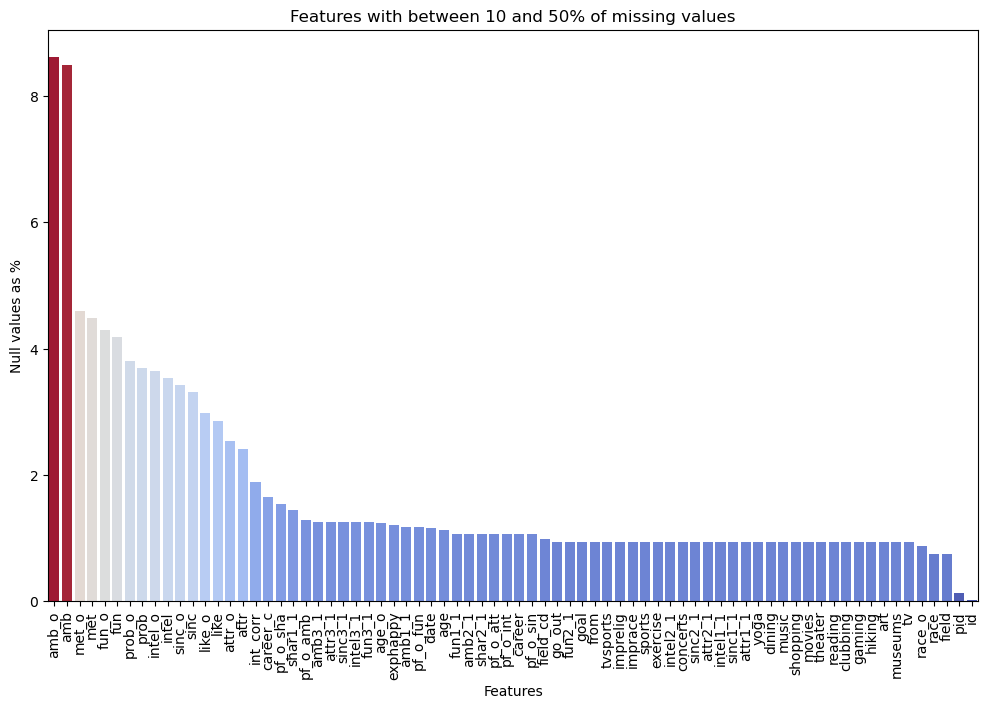

In [401]:
df_most_empty = df_empty[(df_empty[0]<=10) & (df_empty[0]>0)]

fig, ax = plt.subplots(figsize=(k_Width, k_Height))
sns.barplot (df_most_empty,  x=df_most_empty.index, y=0, palette="coolwarm", hue=0, legend=False);               
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_title("Features with between 10 and 50% of missing values")
ax.set_xlabel("Features")
ax.set_ylabel("Null values as %")
plt.show();


**Comments :** 
* At this stage, it seems reasonable to retain the features with less than 10% missing values, in order to carry out an initial analysis.
* Otherwise, we will be suspicious about any result

### Can we visualize the spread of empty cells among the dataset ?

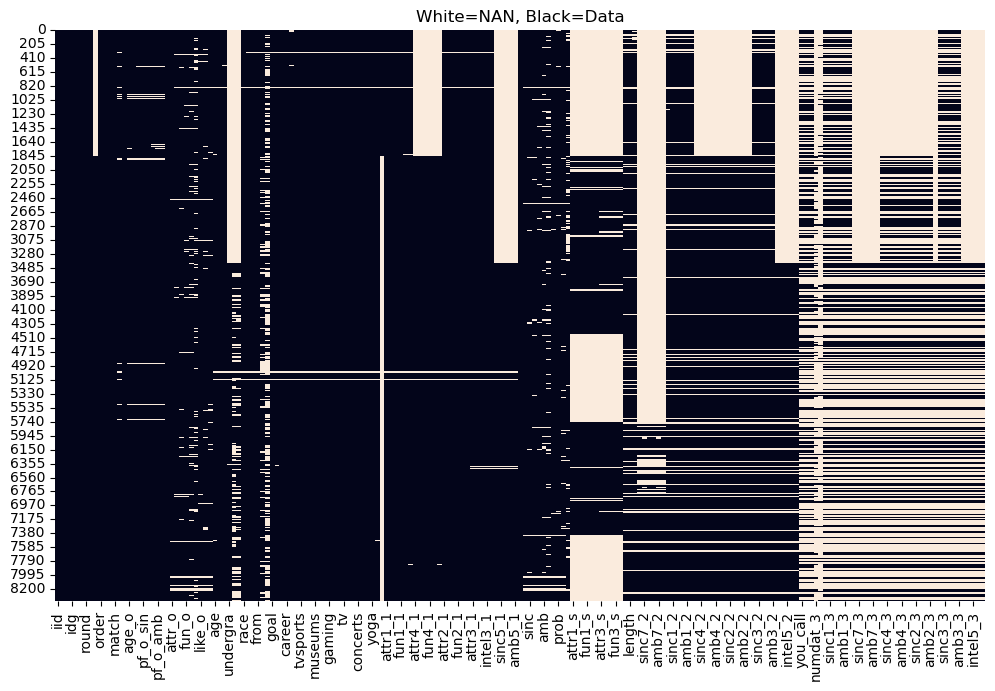

In [402]:
# thanks to Machine Learnia (Youtube) I really like this way of graphing missing data
plt.figure(figsize=(k_Width, k_Height))
plt.title("White=NAN, Black=Data")
_ = sns.heatmap(dataset.isna(), cbar=False)

**Comments :** 
* Once again, it appears clearly that _3, _2 and _s attributes seems to be the most impacted by the lack of data
* Features with the smallest number of missing values comes from the forms filled before the event (features ending with _1) 

We will need to either : 
* Only take into account data before the event (_1)
* Remove features of type _2, _3, _s
* Split the analysis to differenciate results from data before the event and results from data during or after the event 

**Decision :**
* We will retain those features with less than 10% of missing values and carry out an initial basic analysis.



## Conclusion of "Understanding the dataset"
* At this point 26% of the data are missing but some features have way more than 50% of observations missing
* No missing values in the target (`match`) however
* Forms were filled before the begining of the event but not during or after
* We will change some data type to make sure their type is conform to the data they represent
* We need to do some sanity check in order to avoid some weird values in the observations
* We are going to update some feature names to make them more meaningful
* From now on, we will continue this EDA keeping features with less than **10%** of missing values

# 2. Transforming the dataset

## Remove features with more than 10% of missing values

In [403]:
treshold = len(dataset) * k_treshold
missing_values_per_feat = dataset.isnull().sum()
to_keep = missing_values_per_feat[missing_values_per_feat <= treshold].index
dataset = dataset[to_keep]
dataset.head()


,iid,id,gender,idg,condtn,wave,round,position,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,like,prob,met
0,1,1.0,0,1,1,1,10,7,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,7.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,6.0,9.0,7.0,7.0,6.0,7.0,6.0,2.0
1,1,1.0,0,1,1,1,10,7,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,8.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,8.0,7.0,8.0,5.0,7.0,5.0,1.0
2,1,1.0,0,1,1,1,10,7,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,NaN,1.0
3,1,1.0,0,1,1,1,10,7,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,7.0,7.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,6.0,8.0,7.0,6.0,7.0,6.0,2.0
4,1,1.0,0,1,1,1,10,7,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,8.0,6.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,2.0


In [404]:
tmp_df = quick_view(dataset)

print("Below only THE FIRST 20 features are listed : \n")
display(tmp_df.sort_values(by="num_of_non_null", ascending=False).head(20))
# display(summary_df.sort_values(by="num_of_null", ascending=False))                 # uncomment to get access to all features at once
# display(tmp_df.sort_values(by="col_name"))
# display(tmp_df)

Below only THE FIRST 20 features are listed : 



,col_name,col_dtype,num_of_null,percent_of_null,num_of_non_null,num_of_distinct_values,max_value,min_value,distinct_values_counts
0,iid,int64,0,0.00,8378,551,552.0,1.0,"{552: 22, 530: 22, 528: 22, 527: 22, 526: 22, ..."
13,samerace,int64,0,0.00,8378,2,1.0,0.0,"{0: 5062, 1: 3316}"
2,gender,int64,0,0.00,8378,2,1.0,0.0,"{1: 4194, 0: 4184}"
3,idg,int64,0,0.00,8378,44,44.0,1.0,"{1: 277, 5: 277, 3: 277, 6: 276, 10: 276, 8: 2..."
4,condtn,int64,0,0.00,8378,2,2.0,1.0,"{2: 6944, 1: 1434}"
5,wave,int64,0,0.00,8378,21,21.0,1.0,"{21: 968, 11: 882, 9: 800, 14: 720, 15: 684, 4..."
6,round,int64,0,0.00,8378,15,22.0,5.0,"{18: 1350, 20: 1160, 22: 968, 21: 882, 10: 880..."
7,position,int64,0,0.00,8378,22,22.0,1.0,"{3: 554, 2: 554, 6: 544, 4: 544, 1: 526, 8: 51..."
8,order,int64,0,0.00,8378,22,22.0,1.0,"{4: 551, 5: 551, 1: 551, 2: 551, 3: 551, 6: 54..."
9,partner,int64,0,0.00,8378,22,22.0,1.0,"{1: 551, 2: 551, 6: 551, 4: 546, 5: 546, 3: 54..."


## Remove some observations
* when ``pid`` (partner unique id) is missing
* when `id` (id in the wave) is missing 

In [405]:
observations_to_drop = ["pid", "id"]

for col_name in observations_to_drop:
  dataset = dataset.dropna(subset=[col_name])


## Renaming features
* All features are lower case
* All features have no space
* The process was deliberatley "manual". Indeed  it helped a lot to check and double check (with the documentation) the meaning of each column. Yes, we could have used some regular expression but once started, the capabilities of VSCode in terms of edition were good enough for the rest of the task.
* I decided to use, long and descriptive names just to make sure, 6 months from now, one can read the graphs, charts and table easily.


In [406]:
# dataset.columns

In [407]:
new_names = {
  'iid'      : 'participant_uid',
  'id'       : 'participant_id_in_wave',
  'idg'      : 'participant_id_in_gender',
  'condtn'   : 'limited_choice',
  'wave'     : 'wave_id',
  'partner'  : 'partner_id',
  'pid'      : 'partner_uid',
  'int_corr' : 'inter_correlation',
  'samerace' : 'same_race',
  'age_o'    : 'partner_age',
  'race_o'   : 'partner_race',
  'race'     : 'participant_race',
  'field_cd' : 'field_coded',
  'imprace'  : 'important_race',
  'imprelig' : 'important_religion',
  'from'     : 'coming_from',
  'goal'     : 'goal_participating',
  'date'     : 'freq_dating',
  'go_out'   : 'freq_go_out',
  'career_c' : 'career_coded',
  'exphappy' : 'xpectation_happy',
  'dec'      : 'decision',
}
dataset.rename(columns=new_names, inplace=True)
# dataset.columns

In [408]:
new_names = {
  'pf_o_att':  'partner_before_event_look_for_attractive',
  'pf_o_sin':  'partner_before_event_look_for_sincere',
  'pf_o_int':  'partner_before_event_look_for_intelligent',
  'pf_o_fun':  'partner_before_event_look_for_fun',
  'pf_o_amb':  'partner_before_event_look_for_ambitious',
  'pf_o_sha':  'partner_before_event_look_for_shared_interests',
}
dataset.rename(columns=new_names, inplace=True)
# dataset.columns


In [409]:
new_names = {
  'dec_o'   : 'partner_night_event_decision',
  'attr_o'  : 'partner_night_event_look_for_attractive',
  'sinc_o'  : 'partner_night_event_look_for_sincere',
  'intel_o' : 'partner_night_event_look_for_intelligent',
  'fun_o'   : 'partner_night_event_look_for_fun',
  'amb_o'   : 'partner_night_event_look_for_ambitious',
  'like_o'  : 'partner_night_event_how_much_he_like',
  'prob_o'  : 'partner_night_event_proba_participant_to_say_yes',
  'met_o'   : 'partner_night_event_met_before',
}
dataset.rename(columns=new_names, inplace=True)
# dataset.columns

In [410]:
new_names = {
  'attr' : 'participant_rating_attractiveness', 
  'sinc' : 'participant_rating_sincerity',
  'intel': 'participant_rating_intelligence',
  'fun'  : 'participant_rating_fun',
  'amb'  : 'participant_rating_ambition',
  'like' : 'participant_rating_how_much_he_like',
  'prob' : 'participant_rating_proba_partner_to_say_yes',
  'met'  : 'participant_rating_met_before',
}
dataset.rename(columns=new_names, inplace=True)
# dataset.columns


In [411]:
new_names = {
  'attr1_1'  : 'participant_before_event_look_for_attractiveness',
  'sinc1_1'  : 'participant_before_event_look_for_sincerity',
  'intel1_1' : 'participant_before_event_look_for_intelligence',
  'fun1_1'   : 'participant_before_event_look_for_fun',
  'amb1_1'   : 'participant_before_event_look_for_ambition',
  'shar1_1'  : 'participant_before_event_look_for_shared_interrests',
}
dataset.rename(columns=new_names, inplace=True)
# dataset.columns

In [412]:
new_names = {
  'attr2_1'  : 'participant_guess_partner_look_for_attractiveness',
  'sinc2_1'  : 'participant_guess_partner_look_for_sincerity',
  'intel2_1' : 'participant_guess_partner_look_for_intelligence',
  'fun2_1'   : 'participant_guess_partner_look_for_fun',
  'amb2_1'   : 'participant_guess_partner_look_for_ambition',
  'shar2_1'  : 'participant_guess_partner_look_for_shared_interrests',
}
dataset.rename(columns=new_names, inplace=True)
# dataset.columns


In [413]:
new_names = {
  'attr3_1'  : 'participant_self_rating_for_attractiveness',
  'sinc3_1'  : 'participant_self_rating_for_sincerity',
  'intel3_1' : 'participant_self_rating_for_intelligence',
  'fun3_1'   : 'participant_self_rating_for_fun',
  'amb3_1'   : 'participant_self_rating_for_ambition',
  # 'shar3_1'  : 'participant_guess_partner_look_for_shared_interests',
}
dataset.rename(columns=new_names, inplace=True)
# dataset.columns


## Droping `field` and ``career`` features
* As demonstrated below these features have, way too much, modalities.  
* We can drop the features and use their respective `coded` versions instead.

In [414]:
print("There are :")
print(f"\t{len(dataset['field'].unique())} unique fields of study in the 'field' features.")
print(f"\t{len(dataset['career'].unique())} unique cerreers in the 'career' features.")

There are :
	260 unique fields of study in the 'field' features.
	368 unique cerreers in the 'career' features.


In [415]:
to_drop = ["field", "career"]

dataset.drop(columns = to_drop, inplace=True)
dataset.columns

Index(['participant_uid', 'participant_id_in_wave', 'gender', 'participant_id_in_gender', 'limited_choice', 'wave_id', 'round', 'position', 'order', 'partner_id', 'partner_uid', 'match', 'inter_correlation', 'same_race', 'partner_age', 'partner_race', 'partner_before_event_look_for_attractive', 'partner_before_event_look_for_sincere', 'partner_before_event_look_for_intelligent', 'partner_before_event_look_for_fun', 'partner_before_event_look_for_ambitious', 'partner_before_event_look_for_shared_interests', 'partner_night_event_decision', 'partner_night_event_look_for_attractive', 'partner_night_event_look_for_sincere', 'partner_night_event_look_for_intelligent', 'partner_night_event_look_for_fun', 'partner_night_event_look_for_ambitious', 'partner_night_event_how_much_he_like', 'partner_night_event_proba_participant_to_say_yes', 'partner_night_event_met_before', 'age', 'field_coded', 'participant_race', 'important_race', 'important_religion', 'coming_from', 'goal_participating',
      

## Adding a `gender_description` feature
* This will help to read the graphs

In [416]:
dataset["gender_description"]                           = "Man"
dataset.loc[dataset["gender"]==0, "gender_description"] = "Woman"


## Replacing ``career_code`` with descriptions


In [417]:
code_descr = {
  "1.0"  : "Lawyer",
  "2.0"  : "Academic/Research",
  "3.0"  : "Psychologist",
  "4.0"  : "Doctor/Medicine",
  "5.0"  : "Engineer",
  "6.0"  : "Creative Arts/Entertainment",
  "7.0"  : "Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin",
  "8.0"  : "Real Estate",
  "9.0"  : "International/Humanitarian Affairs",
  "10.0" : "Undecided",
  "11.0" : "Social Work",
  "12.0" : "Speech Pathology",
  "13.0" : "Politics",
  "14.0" : "Pro sports/Athletics",
  "15.0" : "Other",
  "16.0" : "Journalism",
  "17.0" : "Architecture",
}

dataset["partner_race"].fillna(15.0, inplace=True)
dataset["career_coded"] = dataset["career_coded"].astype(str)
dataset["career_coded"] = dataset["career_coded"].replace(code_descr)


## Replacing ``race_code`` with descriptions


In [418]:
# quick view shows that race and race_o have only values in range [1, 6]

code_descr = {
  "1.0"  : "Black/African American",
  "2.0"  : "European/Caucasian-American",
  "3.0"  : "Latino/Hispanic American",
  "4.0"  : "Asian/Pacific Islander/Asian-American",
  "5.0"  : "Native American",
  "6.0"  : "Other",
}
dataset["participant_race"].fillna(6.0, inplace=True)
dataset["participant_race"] = dataset["participant_race"].astype(str)
dataset["participant_race"] = dataset["participant_race"].replace(code_descr)

dataset["partner_race"].fillna(6.0, inplace=True)
dataset["partner_race"] = dataset["partner_race"].astype(str)
dataset["partner_race"] = dataset["partner_race"].replace(code_descr)


## Replacing ``field_code`` with descriptions

In [419]:
code_descr = {
  "1.0"  : "Law",
  "2.0"  : "Math",
  "3.0"  : "Social Science, Psychologist",
  "4.0"  : "Medical Science, Pharmaceuticals, and Bio Tech",
  "5.0"  : "Engineering",
  "6.0"  : "English/Creative Writing/ Journalism",
  "7.0"  : "History/Religion/Philosophy",
  "8.0"  : "Business/Econ/Finance",
  "9.0"  : "Education, Academia",
  "10.0" : "Biological Sciences/Chemistry/Physics",
  "11.0" : "Social Work",
  "12.0" : "Undergrad/undecided",
  "13.0" : "Political Science/International Affairs",
  "14.0" : "Film",
  "15.0" : "Fine Arts/Arts Administration",
  "16.0" : "Languages",
  "17.0" : "Architecture",
  "18.0" : "Other",
}

dataset["field_coded"].fillna(18.0, inplace=True)
dataset["field_coded"] = dataset["field_coded"].astype(str)
dataset["field_coded"] = dataset["field_coded"].replace(code_descr)


## Replacing ``goal_participating`` with descriptions



In [420]:
code_descr = {
  "1.0"  : "Seemed like a fun night",
  "2.0"  : "To meet new people",
  "3.0"  : "To get a date",
  "4.0"  : "Looking for a serious relationship",
  "5.0"  : "To say I did it",
  "6.0"  : "Other",
}

dataset["goal_participating"].fillna(6.0, inplace=True)
dataset["goal_participating"] = dataset["goal_participating"].astype(str)
dataset["goal_participating"] = dataset["goal_participating"].replace(code_descr)


The code below helps to make a quick sanity check over the dataset
  * Change the name of the feature and while the cursor is in the cell, press CTRL+ENTER few times to fly over the dataset

In [421]:
dataset["yoga"].sample(10)

3759    6.0
7501    6.0
3855    1.0
1670    7.0
2680    3.0
7314    6.0
4433    4.0
8243    6.0
1871    3.0
4458    5.0
Name: yoga, dtype: float64

## Changing some data types

* We start by checking the data types with the table below
* Here, only 10 rows are displayed however it can help to display features by 
    * name                   : checking typo, consistency...
    * num_of_distinct_values : with 2 values, should the feature, be a bool? Is there only one values in the features? 
    * percent_of_null        : sanity check
    * ...

In [422]:
tmp_df = quick_view(dataset)
# display(summary_df.head(10))
# display(tmp_df.sort_values(by="num_of_distinct_values"))
display(tmp_df.sort_values(by="col_name"))


,col_name,col_dtype,num_of_null,percent_of_null,num_of_non_null,num_of_distinct_values,max_value,min_value,distinct_values_counts
31,age,float64,94,1.12,8273,24,55.00,18.00,"{27.0: 1059, 23.0: 894, 26.0: 869, 24.0: 863, ..."
46,art,float64,79,0.94,8288,11,10.00,0.00,"{8.0: 1749, 7.0: 1349, 5.0: 999, 10.0: 954, 6...."
40,career_coded,object,0,0.00,8367,18,-1.00,1.00,"{'Academic/Research': 2320, 'Banking/Consultin..."
49,clubbing,float64,79,0.94,8288,11,10.00,0.00,"{8.0: 1401, 7.0: 1289, 6.0: 1134, 9.0: 981, 5...."
36,coming_from,object,79,0.94,8288,269,-1.00,1.00,"{'New York': 521, 'New Jersey': 364, 'Californ..."
54,concerts,float64,79,0.94,8288,11,10.00,0.00,"{7.0: 1529, 8.0: 1448, 6.0: 1197, 9.0: 1155, 5..."
76,decision,int64,0,0.00,8367,2,1.00,0.00,"{0: 4852, 1: 3515}"
44,dining,float64,79,0.94,8288,10,10.00,1.00,"{8.0: 1920, 9.0: 1642, 10.0: 1520, 7.0: 1511, ..."
43,exercise,float64,79,0.94,8288,10,10.00,1.00,"{8.0: 1355, 7.0: 1196, 6.0: 1160, 5.0: 1052, 9..."
32,field_coded,object,0,0.00,8367,18,-1.00,1.00,"{'Business/Econ/Finance': 1923, 'Biological Sc..."


### Converting some features to int

* It is also a good opportunity to replace Null values

Here are the features impacted so far : 
<!-- * `goal_participating` -->
* `freq_dating`
* `freq_go_out`
* ``partner_uid``
* ``participant_id_in_wave``




In [423]:
convert_to_int1 = ["freq_dating", "freq_go_out", "partner_uid", "participant_id_in_wave"]  #"goal_participating",


# Set the value to replace if there is a missing value
# Use quickview to check the range and valuess if needed
# Example
# goal                    set to 6 = other 
# freq_dating             set to 0
# freq_go_out             set to 0
# partner_uid             drop the line
# participant_id_in_wave  ??? 
# TV etc.                 set to 0



for col_name in convert_to_int1:
  # dataset = dataset.dropna(subset=[col_name])
  dataset[col_name].fillna(0, inplace=True)
  dataset[col_name] = dataset[col_name].astype(int)




In [424]:
convert_to_int2 = ["sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga"]

for col_name in convert_to_int2:
  dataset[col_name].fillna(1, inplace=True)
  dataset[col_name].replace(0, 1, inplace=True)
  dataset[col_name] = dataset[col_name].astype(int)


* With this features we make sure to convert to the closer int
* Indeed they are category from 1 to 10 but some seems to have weird values

In [425]:
# attr     : participant_rating_attractiveness                 - INT      à convertir en entier le plus proche 1 2 3...
# attr3_1  : participant_self_rating_for_attractiveness        - INT      convertir en entier le plus proche 1 2 3...

convert_to_int3 = ["participant_rating_attractiveness", "participant_self_rating_for_attractiveness"]

for col_name in convert_to_int3:
  # replace missing values with 5 = mid value => so-so
  dataset[col_name].fillna(5, inplace=True)
  # replace 0 with 5
  dataset[col_name] = dataset[col_name].apply(lambda x: 5 if x == 0 else x)
  dataset[col_name] = dataset[col_name].round().astype(int)



### Converting some features to bool

* Features ranking between 1 and 2 are also concerned (``limited_choice`` and `participant_rating_met_before` for example)
* It is also a good opportunity to replace Null values with a default value

Here are the features impacted so far : 
* `same_race`
* `decision`
* ``limited_choice`` /Z!\ From 2-1 to 1-0
* `partner_night_event_decision`
* `match`
* `gender`


<!-- # dec_o    : partner_night_event_decision                      - BOOL -->



In [426]:
dataset["limited_choice"].replace(1, 0, inplace=True)
dataset["limited_choice"].replace(2, 1, inplace=True)

convert_to_bool = ["same_race", "decision", "limited_choice", "partner_night_event_decision", "gender"] # "match" is finally excluded since we need it as double in correlation

for col_name in convert_to_bool:
  dataset[col_name] = dataset[col_name].astype(bool)


## Checking and correcting the range of feature values

Using the documentation of the dataset and the ``column_summary()`` tooling function we can check that there are few issues in the range of some features :
* `gaming` : max value is 14 while it should be 10
* `reading ` ; max value is 13 instead of 10
* ...
<!-- * pf_o_att : partner_before_event_look_for_attractive          - FLOAT    vérifier que la somme = 100 ??? -->

In [427]:
def apply_range (cdc) :
  for name in cdc["names"]:
    dataset[name] = np.clip(dataset[name], cdc["min"], cdc["max"])
  return


In [428]:
activities_list = {
  "names" : ["sports", "tvsports", "exercise", "dining", "museums", "art", "hiking", "gaming", "clubbing", "reading", "tv", "theater", "movies", "concerts", "music", "shopping", "yoga"],
  "min"   : 1,
  "max"   : 10,
}

apply_range (activities_list)

## Scaling & Categorizing Attributes

* waves 6-9 score from 1 to 10
* waves 1-5 and 10-21 distribute 100 points among 6 attributes
* The attributes are : 
    * Attractive		
    * Sincere		    
    * Intelligent		
    * Fun			      
    * Ambitious		      
    * Shared Interests

In order to be able to compare apple with apple among differents waves, we take the decision to scale the scores to 100.  


In [429]:
attributes = [
  "participant_before_event_look_for_ambition",
  "participant_before_event_look_for_attractiveness",
  "participant_before_event_look_for_fun",
  "participant_before_event_look_for_intelligence",
  "participant_before_event_look_for_shared_interrests",
  "participant_before_event_look_for_sincerity",
]

def fill_with_1(row):
    if 6 <= row['wave_id'] <= 9:
      row[attributes] = row[attributes].fillna(1)
    return row

def scale_participants_attributes(row):
    if 6 <= row['wave_id'] <= 9:
        somme = row[attributes].sum()
        for colonne in attributes:
            row[colonne] = row[colonne] / somme * 100
    return row

def split_in_cat(note):
    intervalle_categories = [0, 20, 40, 60, 80, 100]
    categories = ['Not_at_all_important', 'Slightly_important', 'Fairly_important', 'Important', 'Very_important']
    categorie = pd.cut(note, bins=intervalle_categories, labels=categories, right=False)
    return categorie


dataset = dataset.apply(fill_with_1, axis=1)
dataset = dataset.apply(scale_participants_attributes, axis=1)
for col in attributes:
  dataset[col] = split_in_cat(dataset[col])



## Filling missing values ?


### Missing values wise, what is the state of the dataset at this point?

In [430]:
print(f"Total # of cells = {dataset.shape[0]*dataset.shape[1]:>12_.2f}")

empty_cells = dataset.isna().sum().sum()
print(f"# of empty cells = {empty_cells:>12_.2f}")

percent_empty_cells = (100*dataset.isna().sum().sum()/(dataset.shape[0]*dataset.shape[1])).round(2)
print(f"{percent_empty_cells:>.2f} % of the cells are empty")



Total # of cells =   719_562.00
# of empty cells =     7_976.00
1.11 % of the cells are empty


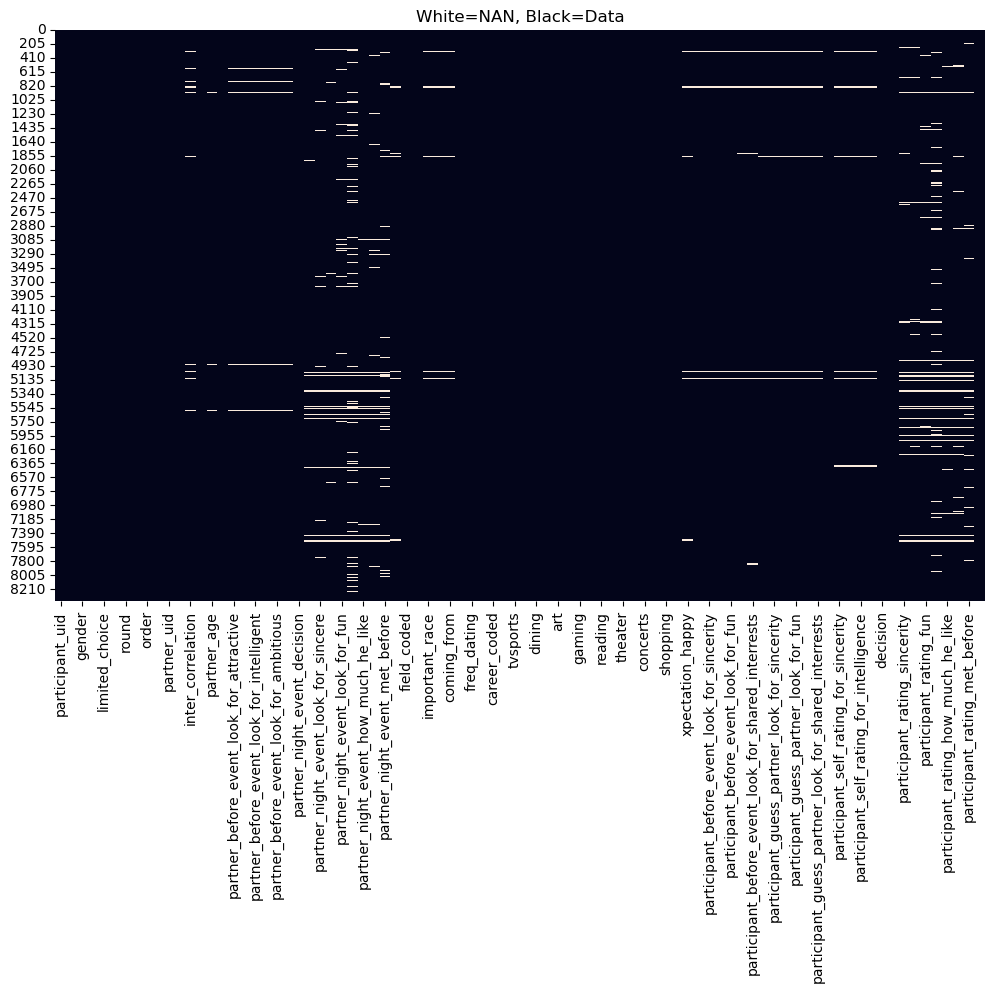

In [431]:
plt.figure(figsize=(k_Width, k_Height))
plt.title("White=NAN, Black=Data")
_ = sns.heatmap(dataset.isna(), cbar=False)

**Comments :** 
* 1.0% of missing values 

**Decision :**
* Keep the dataset as it is
* If needed before to run a second round of EDA we may decide to imput categorical and numerical values 



# 3. What we learn about participants

Here are some of the questions we wanted to answer : 
1. Men & Women
1. Why do the participants come for ?
1. Where do they come from ?
1. What are the least desirable attributes in a male partner? Does this differ for female partners?
1. How important do people think attractiveness is in potential mate selection vs. its real impact?
1. Are shared interests more important than a shared racial background?
1. Can people accurately predict their own perceived value in the dating market?
1. In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

## About participants

* Let's create a ``traits`` with participants focus features
* We make sure to avoid duplicates in this study group

In [432]:
infos = [
  "participant_uid",
  "gender",
  "gender_description",
  "age",
  "participant_race",
  "coming_from",
  "goal_participating",
  "career_coded",
  "field_coded",
  "freq_dating",
  "freq_go_out",
  "important_race",
  "important_religion",
  "art",
  "clubbing",
  "concerts",
  "dining",
  "exercise",
  "gaming",
  "hiking",
  "movies",
  "museums",
  "music",
  "reading",
  "shopping",
  "sports",
  "theater",
  "tv",
  "tvsports",
  "yoga",
  "participant_before_event_look_for_ambition",
  "participant_before_event_look_for_attractiveness",
  "participant_before_event_look_for_fun",
  "participant_before_event_look_for_intelligence",
  "participant_before_event_look_for_shared_interrests",
  "participant_before_event_look_for_sincerity",
  "participant_guess_partner_look_for_ambition",
  "participant_guess_partner_look_for_attractiveness",
  "participant_guess_partner_look_for_fun",
  "participant_guess_partner_look_for_intelligence",
  "participant_guess_partner_look_for_shared_interrests",
  "participant_guess_partner_look_for_sincerity",
  "participant_self_rating_for_ambition",
  "participant_self_rating_for_attractiveness",
  "participant_self_rating_for_fun",
  "participant_self_rating_for_intelligence",
  "participant_self_rating_for_sincerity",
  "xpectation_happy",
]

traits = dataset[infos].drop_duplicates()
traits.sample(5)

,participant_uid,gender,gender_description,age,participant_race,coming_from,goal_participating,career_coded,field_coded,freq_dating,freq_go_out,important_race,important_religion,art,clubbing,concerts,dining,exercise,gaming,hiking,movies,museums,music,reading,shopping,sports,theater,tv,tvsports,yoga,participant_before_event_look_for_ambition,participant_before_event_look_for_attractiveness,participant_before_event_look_for_fun,participant_before_event_look_for_intelligence,participant_before_event_look_for_shared_interrests,participant_before_event_look_for_sincerity,participant_guess_partner_look_for_ambition,participant_guess_partner_look_for_attractiveness,participant_guess_partner_look_for_fun,participant_guess_partner_look_for_intelligence,participant_guess_partner_look_for_shared_interrests,participant_guess_partner_look_for_sincerity,participant_self_rating_for_ambition,participant_self_rating_for_attractiveness,participant_self_rating_for_fun,participant_self_rating_for_intelligence,participant_self_rating_for_sincerity,xpectation_happy
360,31,False,Woman,24.0,European/Caucasian-American,"Washington, DC",Seemed like a fun night,Lawyer,Law,4,3,4.0,8.0,7,6,6,10,7,2,7,8,7,7,6,10,3,8,8,3,6,Not_at_all_important,Slightly_important,Slightly_important,Slightly_important,Not_at_all_important,Not_at_all_important,5.0,40.0,25.0,10.0,10.0,10.0,9.0,8,9.0,8.0,8.0,5.0
5078,344,False,Woman,26.0,Latino/Hispanic American,New Mexico,To get a date,International/Humanitarian Affairs,Political Science/International Affairs,4,3,1.0,3.0,6,9,9,6,5,3,4,9,7,9,4,9,9,9,4,7,5,Slightly_important,Not_at_all_important,Slightly_important,Not_at_all_important,Not_at_all_important,Not_at_all_important,10.0,30.0,20.0,10.0,20.0,10.0,9.0,7,8.0,8.0,7.0,5.0
1548,106,True,Man,22.0,Latino/Hispanic American,Texas,To say I did it,Lawyer,Law,7,3,1.0,3.0,5,2,2,9,2,9,4,9,6,8,9,5,2,7,8,4,3,Not_at_all_important,Not_at_all_important,Not_at_all_important,Slightly_important,Slightly_important,Slightly_important,5.0,20.0,20.0,20.0,20.0,15.0,2.0,4,3.0,9.0,7.0,5.0
5858,385,False,Woman,25.0,European/Caucasian-American,Oregon,To meet new people,Academic/Research,"Education, Academia",5,3,5.0,8.0,10,8,8,10,8,6,10,10,10,10,9,9,7,10,6,5,8,Not_at_all_important,Slightly_important,Slightly_important,Slightly_important,Not_at_all_important,Slightly_important,5.0,50.0,20.0,10.0,10.0,5.0,6.0,8,6.0,8.0,8.0,7.0
7392,506,True,Man,24.0,Asian/Pacific Islander/Asian-American,California,Seemed like a fun night,Banking/Consulting/Finance/Marketing/Business/...,Math,7,2,5.0,5.0,7,4,5,7,6,2,8,5,7,5,9,2,6,5,2,4,1,Not_at_all_important,Not_at_all_important,Not_at_all_important,Slightly_important,Slightly_important,Not_at_all_important,10.0,20.0,20.0,10.0,20.0,20.0,10.0,5,7.0,9.0,8.0,4.0


In [433]:
traits.info()

<class 'pandas.core.frame.DataFrame'>
Index: 551 entries, 0 to 8356
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   participant_uid                                       551 non-null    int64   
 1   gender                                                551 non-null    bool    
 2   gender_description                                    551 non-null    object  
 3   age                                                   543 non-null    float64 
 4   participant_race                                      551 non-null    object  
 5   coming_from                                           544 non-null    object  
 6   goal_participating                                    551 non-null    object  
 7   career_coded                                          551 non-null    object  
 8   field_coded                                           

* There are 551 unique participants in total
* We still have some missing values (see the bottom of the list above for example)

### Women & Men

In [434]:
pivot_df = traits.pivot_table(index='gender_description', columns='age', values='participant_uid', aggfunc='count', margins=True, margins_name="Total")
print(pivot_df)

age                 18.0  19.0  20.0  21.0  22.0  23.0  24.0  25.0  26.0  27.0  28.0  29.0  30.0  31.0  32.0  33.0  34.0  35.0  36.0  37.0  38.0  39.0  42.0  55.0  Total
gender_description                                                                                                                                                       
Man                  1.0   1.0   2.0   8.0  20.0  24.0  27.0  26.0  24.0  40.0  28.0  23.0  22.0   4.0  10.0   5.0   4.0   NaN   2.0   1.0   NaN   1.0   1.0   NaN    274
Woman                NaN   1.0   3.0  14.0  24.0  32.0  29.0  29.0  31.0  28.0  19.0  17.0  14.0   3.0   3.0   7.0   7.0   4.0   2.0   NaN   1.0   NaN   NaN   1.0    269
Total                1.0   2.0   5.0  22.0  44.0  56.0  56.0  55.0  55.0  68.0  47.0  40.0  36.0   7.0  13.0  12.0  11.0   4.0   4.0   1.0   1.0   1.0   1.0   1.0    543


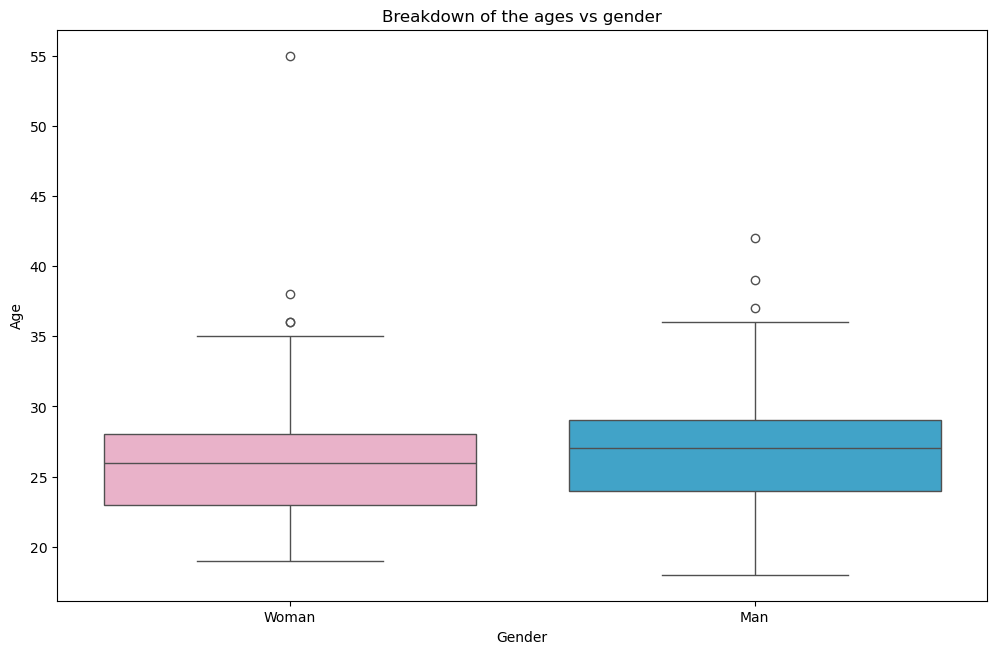

In [435]:
fig, ax = plt.subplots(figsize=(k_Width, k_Height))
sns.boxplot(traits, x='gender_description', y='age',  hue="gender" , palette=palette_gender, legend=False)
plt.title('Breakdown of the ages vs gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

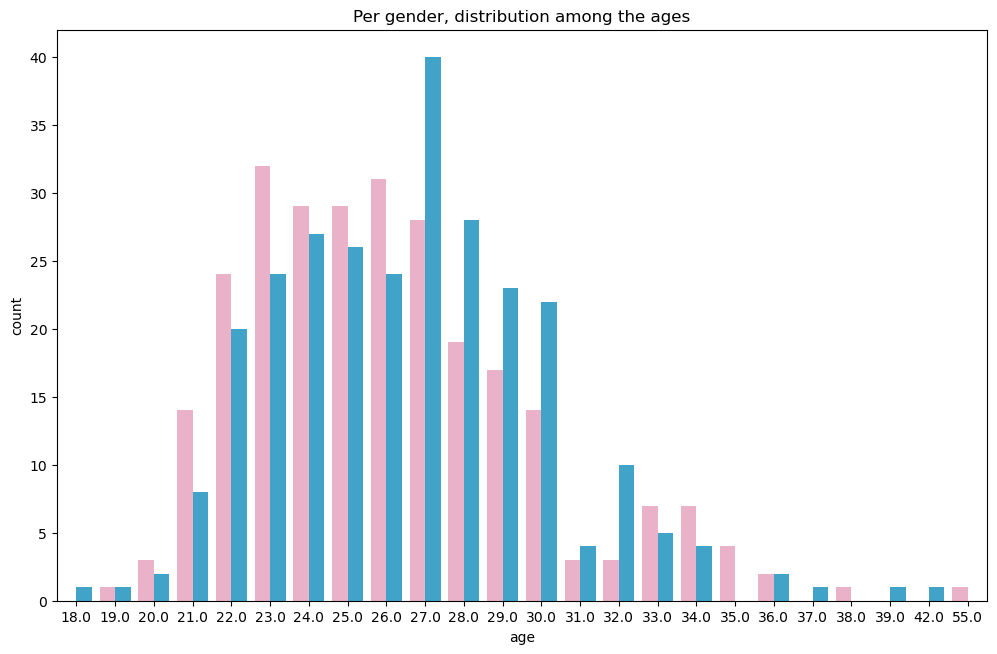

In [436]:
fig, ax = plt.subplots(figsize=(k_Width, k_Height))
sns.countplot(traits, x="age", hue="gender", palette=palette_gender, legend=False)
ax.set_title("Per gender, distribution among the ages");

In [437]:
pivot_df = traits.pivot_table(index='gender_description', columns='participant_race', values='participant_uid', aggfunc='count', margins=True, margins_name="Total")
print(pivot_df)

participant_race    Asian/Pacific Islander/Asian-American  Black/African American  European/Caucasian-American  Latino/Hispanic American  Other  Total
gender_description                                                                                                                                    
Man                                                    65                      10                          162                        17     23    277
Woman                                                  71                      16                          142                        25     20    274
Total                                                 136                      26                          304                        42     43    551


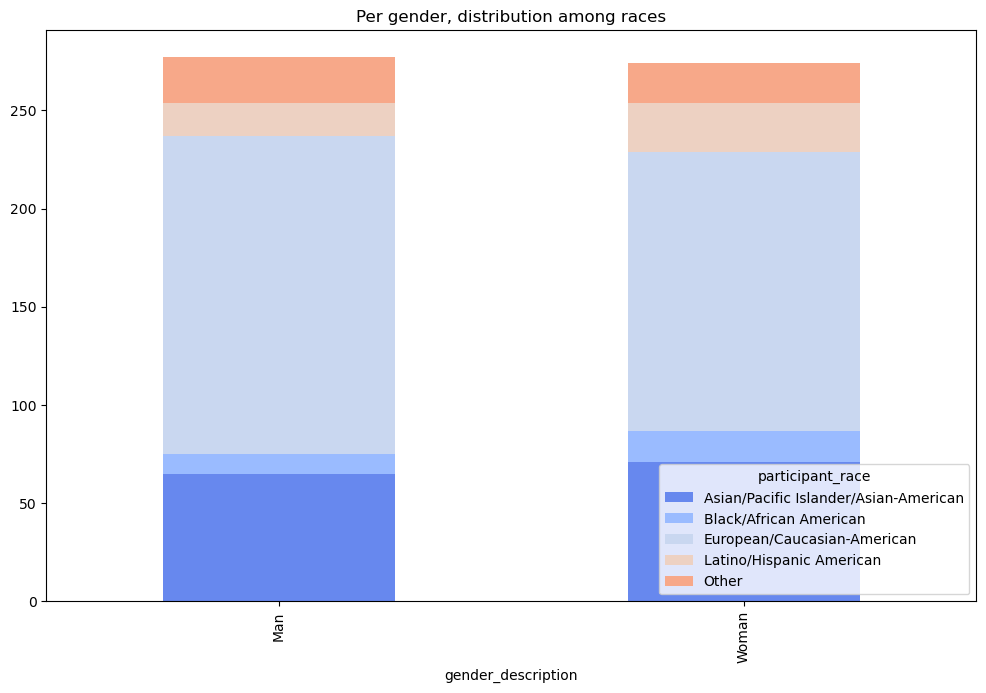

In [438]:
sns.set_palette("coolwarm")
pivot_df.iloc[:-1, :-1].plot(kind='bar', stacked=True, figsize=(k_Width, k_Height), title="Per gender, distribution among races" );

In [439]:
pivot_df = traits.pivot_table(index='gender_description', columns='goal_participating', values='participant_uid', aggfunc='count', margins=True, margins_name="Total")
print(pivot_df)

goal_participating  Looking for a serious relationship  Other  Seemed like a fun night  To get a date  To meet new people  To say I did it  Total
gender_description                                                                                                                               
Man                                                 13     18                      113             27                  89               17    277
Woman                                                9     19                      115             13                 100               18    274
Total                                               22     37                      228             40                 189               35    551


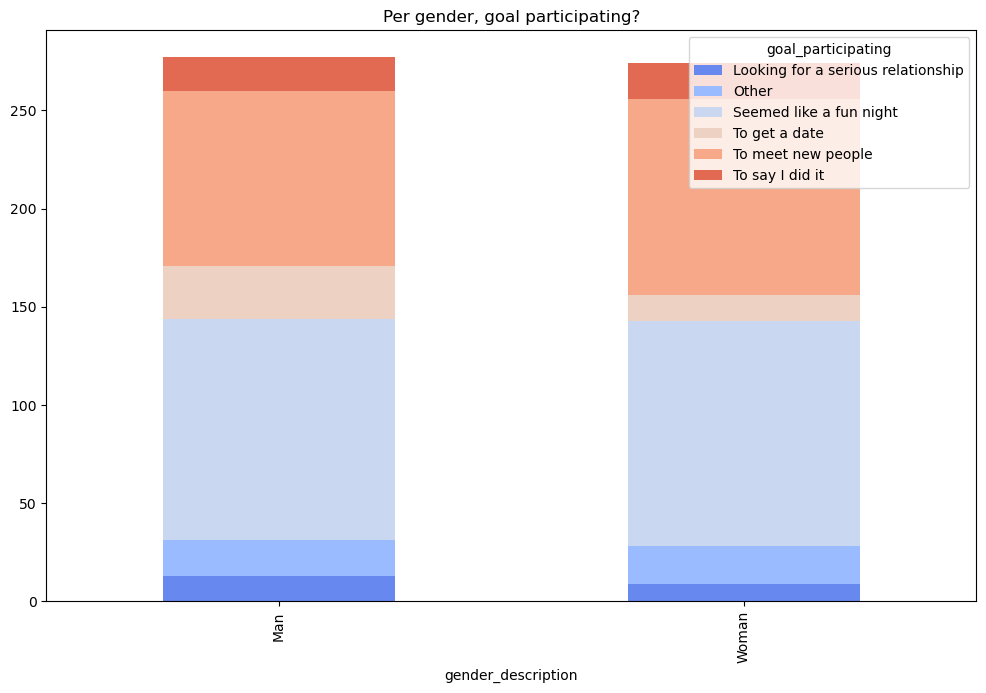

In [440]:
sns.set_palette("coolwarm")
pivot_df.iloc[:-1, :-1].plot(kind='bar', stacked=True, figsize=(k_Width, k_Height), title="Per gender, goal participating?" );

In [441]:
pivot_df = traits.pivot_table(index='gender_description', columns='important_religion', values='participant_uid', aggfunc='count', margins=True, margins_name="Total")
print(pivot_df)

important_religion  1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0  Total
gender_description                                                          
Man                 132   24   29   13   19   19   17   13    7     2    275
Woman                74   29   33   22   29   19   14   20   11    18    269
Total               206   53   62   35   48   38   31   33   18    20    544


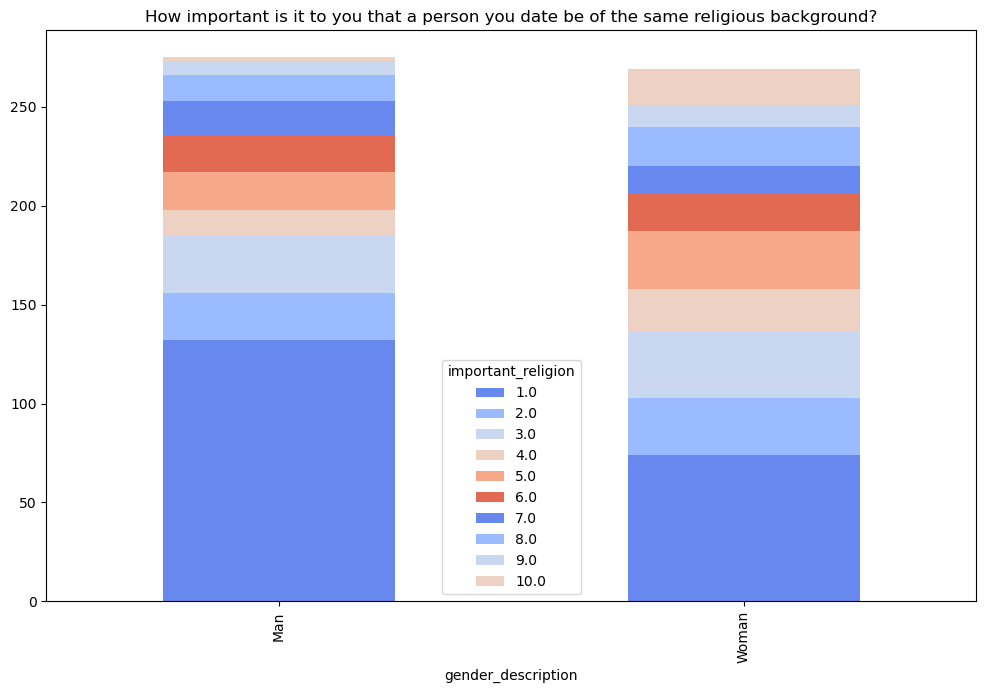

In [442]:
sns.set_palette("coolwarm")
pivot_df.iloc[:-1, :-1].plot(kind='bar', stacked=True, figsize=(k_Width, k_Height), title="How important is it to you that a person you date be of the same religious background?" );

In [443]:
pivot_df = traits.pivot_table(index='gender_description', columns='important_race', values='participant_uid', aggfunc='count', margins=True, margins_name="Total")
print(pivot_df)

important_race      0.0    1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0  10.0  Total
gender_description                                                                         
Man                 NaN  110.0  26.0  35.0  17.0  19.0  20.0  23.0  15.0   7.0   3.0    275
Woman               1.0   79.0  34.0  30.0  16.0  24.0  14.0  12.0  27.0  18.0  14.0    269
Total               1.0  189.0  60.0  65.0  33.0  43.0  34.0  35.0  42.0  25.0  17.0    544


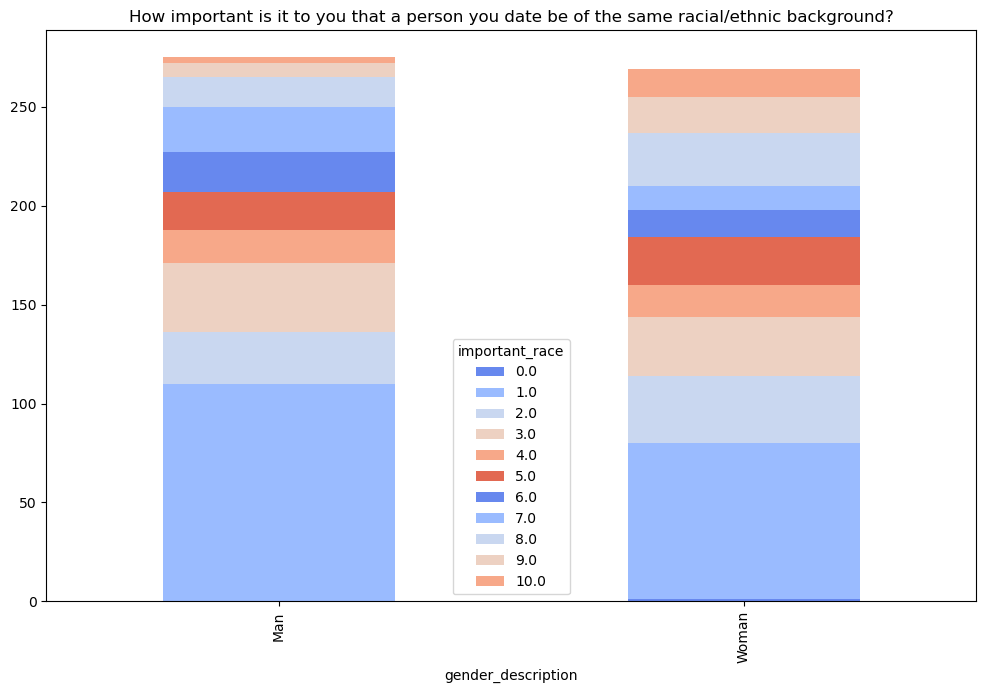

In [444]:
sns.set_palette("coolwarm")
pivot_df.iloc[:-1, :-1].plot(kind='bar', stacked=True, figsize=(k_Width, k_Height), title="How important is it to you that a person you date be of the same racial/ethnic background?" );

#### Comments : 

* Both population are very similar in number, race, ages
* They also decided to participate for the same reasons : mostly **to have fun** and **meet new people**
* Having the same religion seems to be less important for men than for women. Twice as many men say it doesn't matter. In contrast, women are 10 times more likely to say that having the same religion is very important. 
* Being of the same race/ethny seems to no longer be a priority. 57% of the participants rate the importance of this attribute below 3 on a scale of 1 to 10 
* Globally less than 10% of the participants ($\frac{40}{551}$) were expecting to get a date
* Only 11% of the participant expect to get either a date or a serious relationship
* In this small group 2 times as many women as men said they were expecting a date

### What are they looking for or avoiding in the partner ?

* Remeber participant attributes have been rescale and categorized 

In [445]:
attributes=[
  "participant_before_event_look_for_ambition",
  "participant_before_event_look_for_attractiveness",
  "participant_before_event_look_for_fun",
  "participant_before_event_look_for_intelligence",
  "participant_before_event_look_for_shared_interrests",
  "participant_before_event_look_for_sincerity",
]

df_NAAI=pd.DataFrame({
  "Man":[],
  "Woman":[]
})



for attr in attributes:
  pivot_df = traits.pivot_table(index=attr, columns='gender_description', values='participant_uid', aggfunc='count', margins=True, margins_name="Total")
  print(pivot_df)
  print()
  

gender_description                          Man  Woman  Total
participant_before_event_look_for_ambition                   
Not_at_all_important                        264    238  502.0
Slightly_important                            8     32   40.0
Fairly_important                              1      0    1.0
Important                                     0      0    NaN
Very_important                                0      0    NaN
Total                                       273    270  543.0

gender_description                                Man  Woman  Total
participant_before_event_look_for_attractiveness                   
Not_at_all_important                               70    173    243
Slightly_important                                156     83    239
Fairly_important                                   37     13     50
Important                                           9      0      9
Very_important                                      2      1      3
Total                      

#### Comments : 

* Ambition is by far the less attractive attribute 
* The second less attrective attribute is shared interrest
* Surprisingly their is no high score for any attributes
* Attractiveness seems to be more more important than others (it has the highest score in the category "Fairly_important")



### Are shared interests more important than a shared racial background?
* 84% (456/542) of the participants say that shared interrest in not at all important
* On the other hand 34% (189/544) of the participant annonce that shared racial background is not important?
* So it seems that shared racial background is more important than shared interrest

# 4. What we learn about matches

<!-- # corr = dataset.corr(numeric_only=True)

# fig, ax = plt.subplots(figsize=(k_Width,k_Height))
# sns.heatmap(corr)
# plt.suptitle("Matrice de corrélation") -->


### What helps to get matches ?

In [447]:
correlations = dataset.corrwith(dataset["match"], numeric_only=True)
results = pd.DataFrame(correlations, columns=['Correlation'])
results.sort_values(by="Correlation", ascending=False).head(25)

,Correlation
match,1.000000
partner_night_event_decision,0.522274
decision,0.522146
partner_night_event_how_much_he_like,0.305933
participant_rating_how_much_he_like,0.305818
participant_rating_fun,0.277727
partner_night_event_look_for_fun,0.277723
participant_rating_attractiveness,0.264664
partner_night_event_look_for_attractive,0.260905
participant_rating_proba_partner_to_say_yes,0.255572


#### Comments :
* Above is the correlation between ``match`` and the other features
* Except the first 3 (the match itself, participantand partner decision), the list confirm that a match occurs when both participant and partner confirm they like the guy they talked to (obvious). Similarly, but lower in the ranking, matches also happen when partner and participant confirm they are willing to say yes (somewhat obvious too)
* Other than that, ``fun`` seems to be the best trigger for matches before ``attractiveness`` and ``intellingence``.
* Among activities helping to trig match ``clubbing`` is number one. 

### How many matches ?


In [460]:
nb_meetings = dataset.shape[0]
nb_matches  = dataset["match"].sum()

print(f"At this stage, a total of {nb_meetings:_} meetings are taken into account") 
print(f"After these meetings {nb_matches:_} matches were triggered")
print(f"The overall ratio is : {100*nb_matches/nb_meetings:.1f} % (one match every {round(nb_meetings/nb_matches)} meetings.)")


At this stage, a total of 8_367 meetings are taken into account
After these meetings 1_380 matches were triggered
The overall ratio is : 16.5 % (one match every 6 meetings.)


#### Comments :
* We should pay attention to the fact that in the list, matches are counted twice 
    * participant X match with partner Y
    * partner Y match with participant X
* However, since the number of meetings are counted twice also, percentages remain valid.
* We cannot compare the rate of matches in this kind of events versus what happen in the real life. Indeed people come to these events to have fun and meet people. 
* This is not a big surprise if matches happen at a much higher rate here than in every day life.
* At least this ratio is a good metric to monitor

### Does race really not matter ?

In [353]:
pivot_df = dataset.pivot_table(index='match', columns='same_race', values='participant_uid', aggfunc='count', margins=True, margins_name="Total")
print(pivot_df)


same_race  False  True  Total
match                        
0           4237  2750   6987
1            814   566   1380
Total       5051  3316   8367


#### Comments : 
* Facts comfirm what the participants declared. 
* Among the matches 59% ($\frac{814}{1380}$) of them happen between two different races/ethnies

### Does the wave Id matters ?

In [355]:
pivot_df = dataset.pivot_table(index='match', columns='wave_id', values='participant_uid', aggfunc='count', margins=True, margins_name="Total")
print(pivot_df)


wave_id    1    2    3    4    5   6    7    8    9   10   11   12   13   14   15  16   17  18   19  20   21  Total
match                                                                                                              
0        138  546  174  518  126  40  426  164  676  132  754  350  148  594  558  72  232  66  376  74  823   6987
1         62   62   26  130   54  10   86   36  124   30  128   42   32  126  126  24   48   6   74  10  144   1380
Total    200  608  200  648  180  50  512  200  800  162  882  392  180  720  684  96  280  72  450  84  967   8367


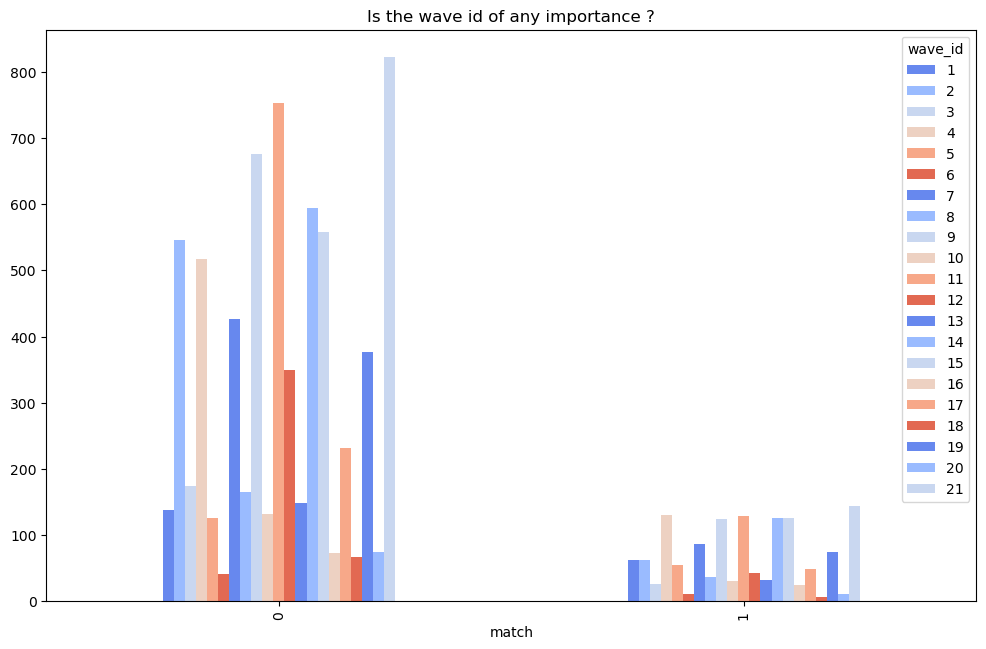

In [359]:
sns.set_palette("coolwarm")
pivot_df.iloc[:-1, :-1].plot(kind='bar', figsize=(k_Width, k_Height), title="Is the wave id of any importance ?" );

#### Comments :
* One could expect an increas along the event while people realize they don't match for exeample.
* However, it seems that the ``wave_id`` has no importance
* Indeed there is no trend (increase, decrease) in the number of matches along the event
* May be a hi_lo pattern may be identifed. This would underline the fact that after checking the ``dec`` checkbox during a wave, people are reluctant to check it again during the next wave. 

### Is there a correlation between how I rate my attractiveness and my ability to match ?

In [376]:
to_keep = ["participant_uid", "participant_self_rating_for_attractiveness", "match"]
tmp_df = dataset[to_keep]
tmp_df = tmp_df.drop_duplicates(subset=["participant_uid"])

pivot_df = tmp_df.pivot_table(index='match', columns='participant_self_rating_for_attractiveness', values='participant_uid', aggfunc='count', margins=True, margins_name="Total")
print(pivot_df)


(551, 3)
participant_self_rating_for_attractiveness    2    3     4     5     6      7      8     9    10  Total
match                                                                                                  
0                                           2.0  8.0  13.0  45.0  55.0  170.0  126.0  36.0  13.0    468
1                                           NaN  NaN   2.0   7.0  16.0   22.0   19.0  13.0   4.0     83
Total                                       2.0  8.0  15.0  52.0  71.0  192.0  145.0  49.0  17.0    551


#### Comments : 

* 77 people think their level of attractiveness is average or below average
* They represent 14% of the participants
* They matched 9 times out of a total of 83 matches. That's 11%.
* So yes, people rate their attractivenes correclty 
* This is not accurate however because their ability to match (14%) is worse than anticipated
* The good news is for the ones who trust their attractivenses
* They represent 86% of the participants but they catched 89% of the matches

People must trust in their attractiveness if they want to match

### Is there a correlation between how fun I think I am and my ability to match ?

In [461]:
to_keep = ["participant_uid", "participant_self_rating_for_fun", "match"]
tmp_df = dataset[to_keep]
tmp_df = tmp_df.drop_duplicates(subset=["participant_uid"])

pivot_df = tmp_df.pivot_table(index='match', columns='participant_self_rating_for_fun', values='participant_uid', aggfunc='count', margins=True, margins_name="Total")
print(pivot_df)


participant_self_rating_for_fun  2.0  3.0  4.0   5.0   6.0    7.0    8.0    9.0  10.0  Total
match                                                                                       
0                                4.0  6.0  7.0  20.0  54.0   97.0  127.0   96.0  50.0    461
1                                NaN  NaN  1.0   3.0   9.0   17.0   22.0   21.0   8.0     81
Total                            4.0  6.0  8.0  23.0  63.0  114.0  149.0  117.0  58.0    542


#### Comments :
* 8 % of the participants believe they are not fun and they are involved in only 5% of the matchs
* the 92% of people who believe they are fun more than average are involved in 95% of the matches 

In [ ]:
to_keep = ["participant_uid", "goal", "match"]
tmp_df = dataset[to_keep]
tmp_df = tmp_df.drop_duplicates(subset=["participant_uid"])

pivot_df = tmp_df.pivot_table(index='match', columns='participant_self_rating_for_attractiveness', values='participant_uid', aggfunc='count', margins=True, margins_name="Total")
print(pivot_df)
